In [107]:
using Gen

@gen function generative_function()
    theta ~ beta(1,1)
    for i in 1:10
        {i} ~ bernoulli(theta)
    end
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[], false, Union{Nothing, Some{Any}}[], var"##generative_function#232", Bool[], false)

In [3]:
trace = simulate(generative_function, ())
get_choices(trace)

│
├── 5 : false
│
├── 8 : false
│
├── 1 : true
│
├── 6 : true
│
├── 9 : false
│
├── 3 : true
│
├── 7 : false
│
├── 4 : false
│
├── 2 : true
│
├── 10 : false
│
└── :theta : 0.44791161582093564


In [44]:
traces = [simulate(generative_function, ()) for _ in 1:1000]
thetas = [get_choices(trace)[:theta] for trace in traces]

1000-element Vector{Float64}:
 0.6685811880782477
 0.5771068927948434
 0.7950617017659732
 0.45509609945150126
 0.23361194374887934
 0.15844321142872247
 0.5824365079148426
 0.0763425435196895
 0.9030369410721069
 0.9344427290834696
 ⋮
 0.8198970429547136
 0.01106442149913032
 0.3736810573775287
 0.31781522567745574
 0.12646651636859219
 0.818060726721195
 0.8605241897143276
 0.5214518324050181
 0.9678332372469162

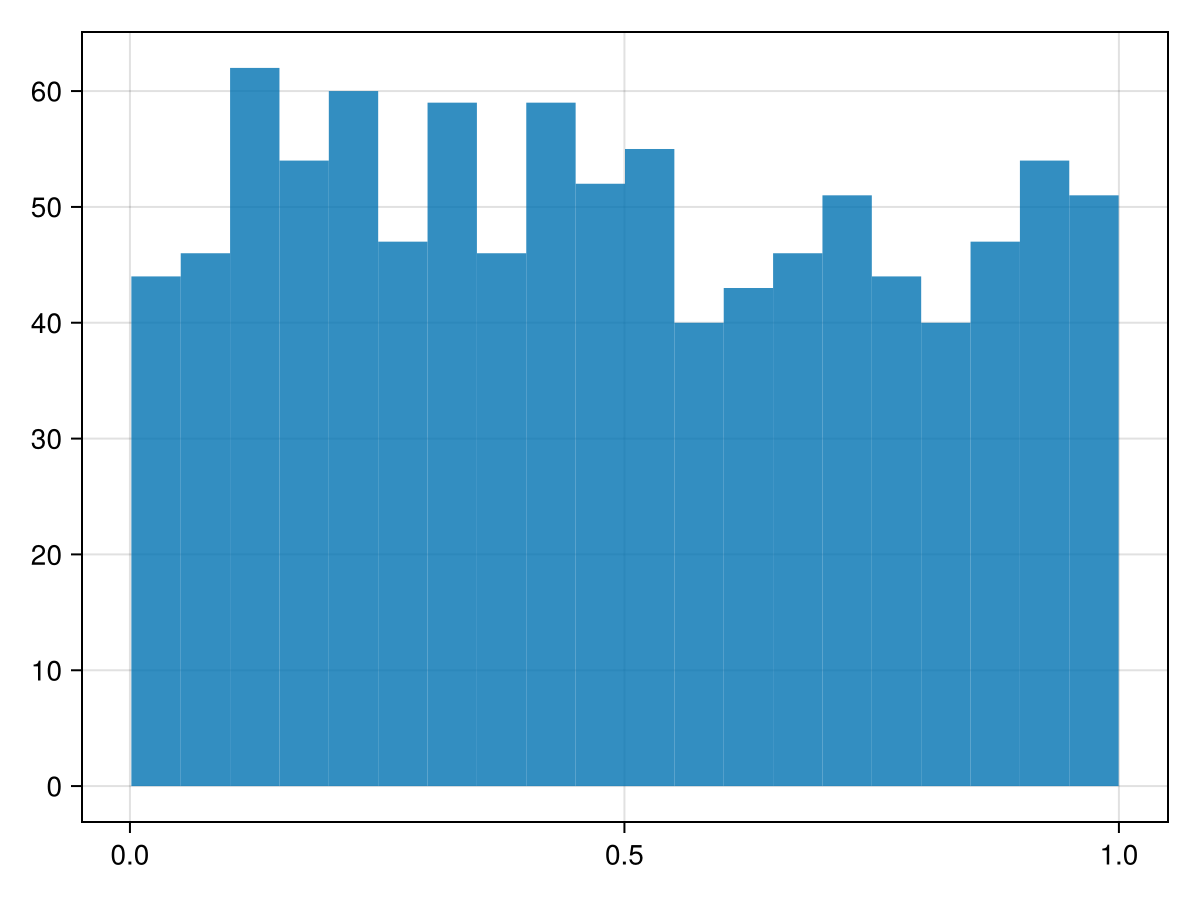

In [46]:
using CairoMakie
hist(thetas, bins=20)

In [116]:
conditions = choicemap()
for i in 1:10
    if i < 2
        conditions[i] = 1
    else 
        conditions[i] = 0
    end
end

trace, = generate(generative_function, (), conditions)
thetas = [trace[:theta]]
scores = [get_score(trace)]
for _ in 1:10000
    trace, a = mh(trace, select(:theta))
    push!(thetas, trace[:theta])
    push!(scores, a)
end

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/Y3ABD/src/scenes.jl:238


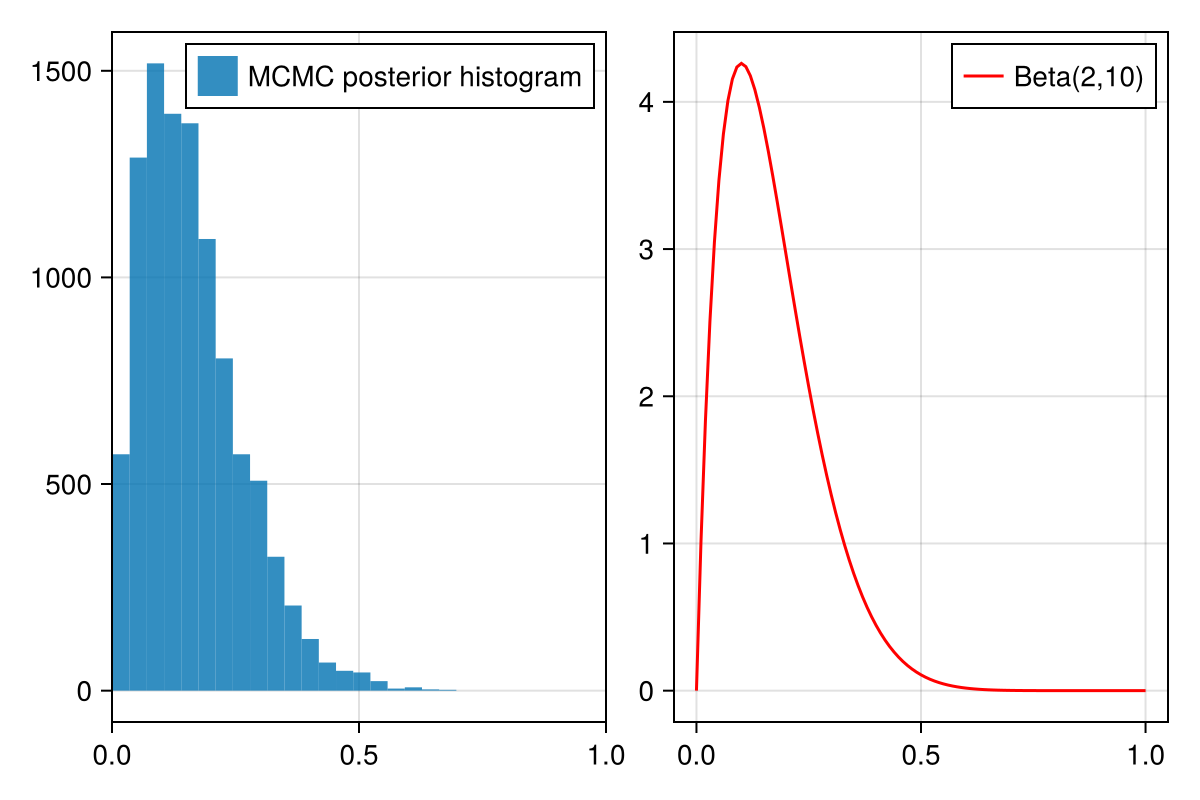

In [117]:
using Distributions
using CairoMakie
fig = Figure(resolution = (600, 400))
ax = Axis(fig[1, 1])
ax2 = Axis(fig[1, 2])

hist!(ax, thetas[20:end], bins=20,  label="MCMC posterior histogram")
xlims!(ax, 0, 1)
lines!(ax2, 0:0.01:1, pdf.(Beta(2,10), 0:0.01:1), color = :red, label="Beta(2,10)")
axislegend(ax)
axislegend(ax2)
fig

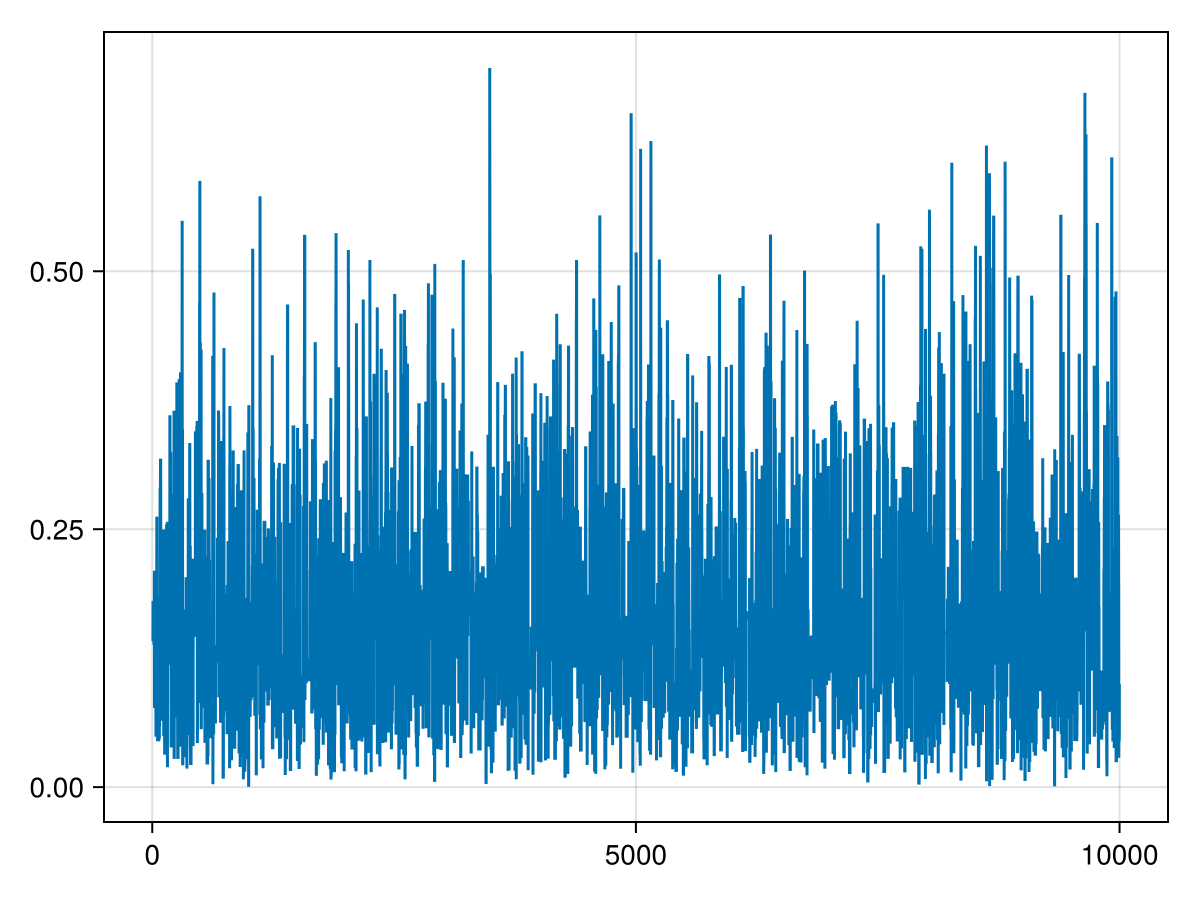

In [120]:
lines(thetas)

In [161]:
using Gen

@gen function unlikely_conditioning()
    theta ~ uniform(0,1e6)
    if theta == 42
        x ~ uniform(0,1)
    else
        x ~ uniform(2,3)
    end
end

DynamicDSLFunction{Any}(Dict{Symbol, Any}(), Dict{Symbol, Any}(), Type[], false, Union{Nothing, Some{Any}}[], var"##unlikely_conditioning#244", Bool[], false)

In [162]:
conditions = choicemap()
conditions[:x] = 1

trace, = generate(unlikely_conditioning, (), conditions)
thetas = [trace[:theta]]
scores = [get_score(trace)]
for _ in 1:10000
    trace, a = mh(trace, select(:theta))
    push!(thetas, trace[:theta])
    push!(scores, a)
end

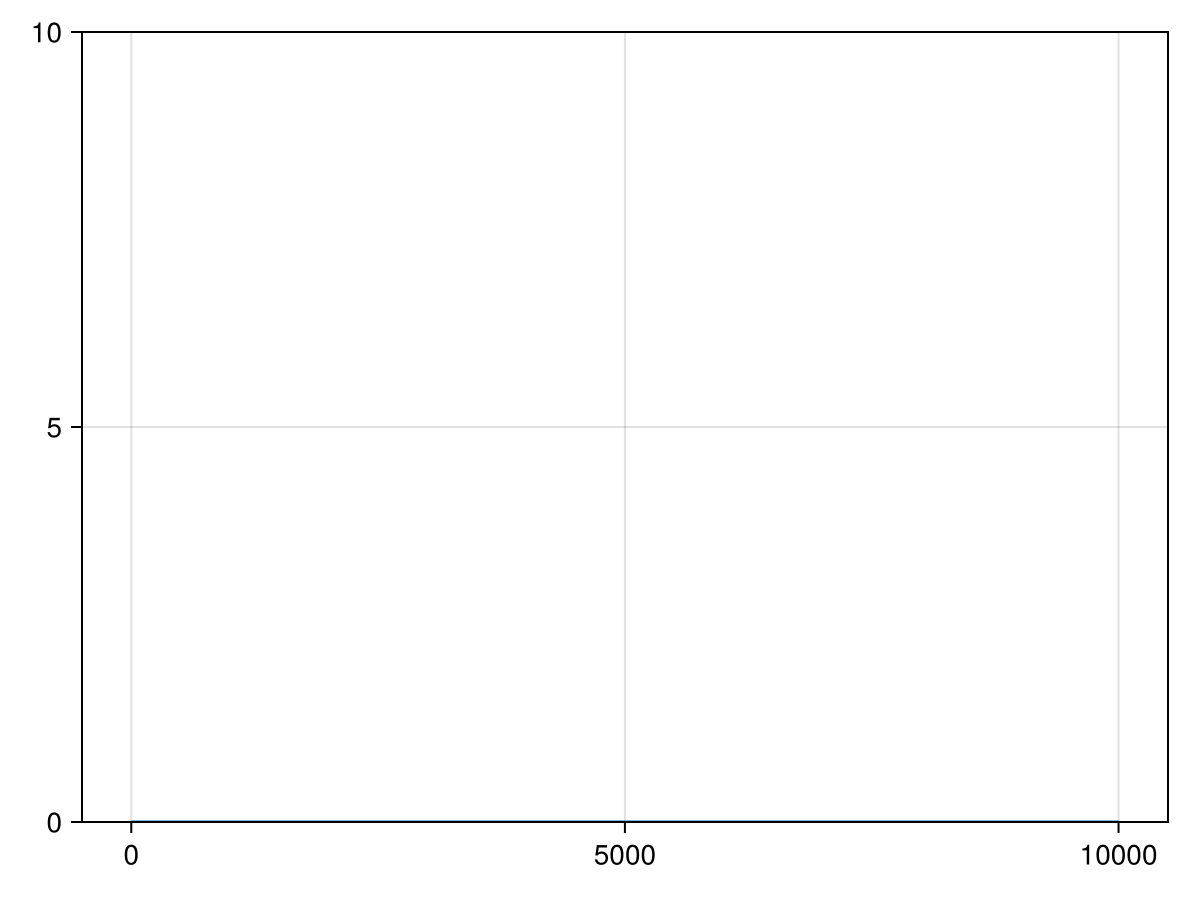

In [158]:
lines(scores)

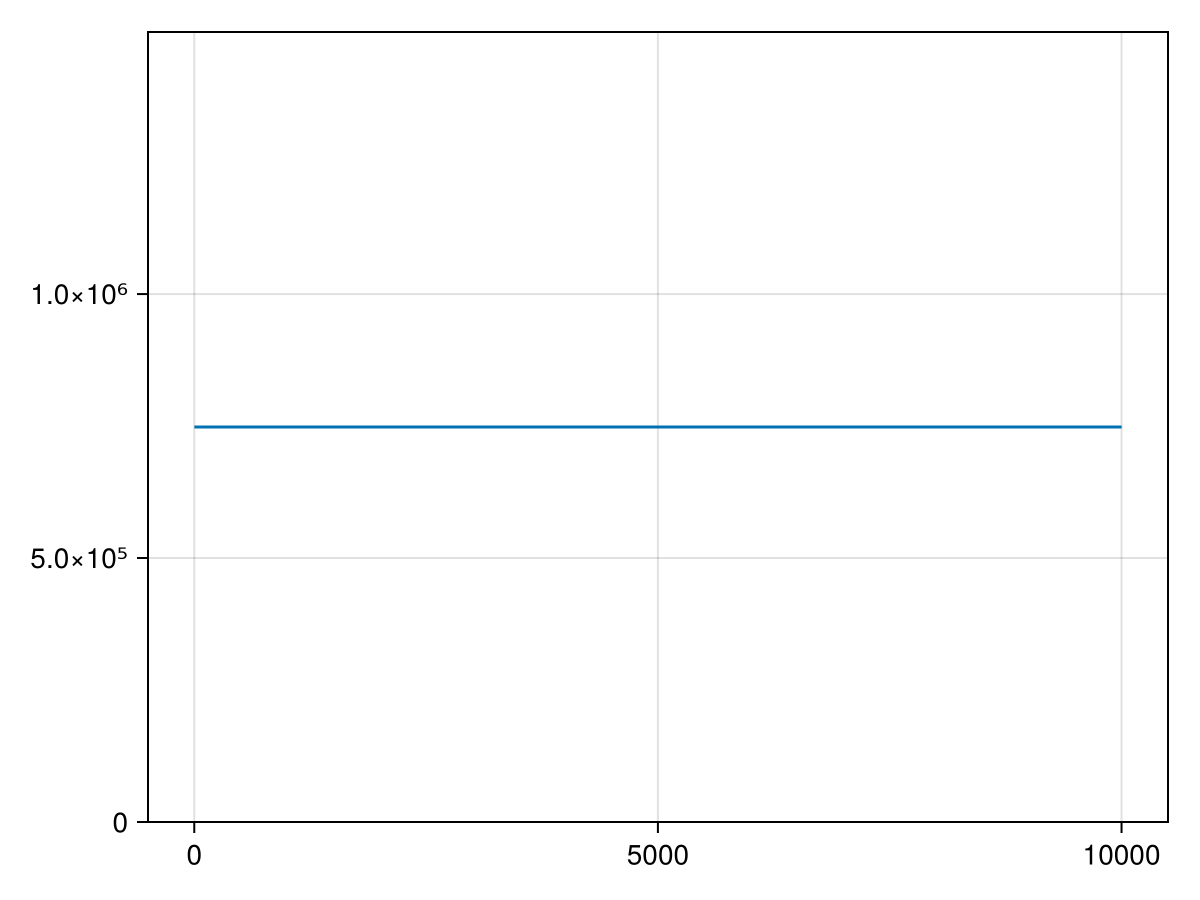

In [160]:
lines(thetas)